Sentiment Analysis: Amazon Product Reviews
Introduction
In this project, we aim to perform sentiment analysis on Amazon product reviews using various machine learning techniques. The dataset we will be using contains more than 1500 reviews of different Amazon products, along with their corresponding ratings. Our objective is to classify these reviews as either negative or positive based on their textual content. We will be using different machine learning algorithms to accomplish this task and evaluate their performance in terms of accuracy and other relevant metrics.


Importing packages and loading data
The data used in this report is the Amazon Consumer Reviews of Amazon Products dataset, obtained from the datafiniti platform. The dataset contains a collection of Amazon product reviews, including information about the product category, name, brand, price, and customer review text and rating. The reviews were written by customers who purchased and used the products, and the dataset includes reviews for a wide range of product categories, from electronics to groceries. The dataset consists of 1500 reviews, and each review contains information about the product, the reviewer, and the review itself. The text of the reviews is particularly interesting, as it provides an opportunity to analyze customer sentiment towards different products and brands.

In [33]:
# import libraries  
import numpy as np
import pandas as pd
import nltk
import re, random, os
import string, pprint
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
from nltk.corpus import stopwords

# spacy for basic preprocessing, optional, can use nltk as well (lemmatisation etc.)
import spacy

# gensim for LDA 
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim
#from pyLDAvis import gensim_models as pg
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [34]:
data = pd.read_csv('product_reviews.csv')
print(data.shape)
data.head()

(1597, 27)


,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams


In [39]:
data.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'dateAdded',
       'dateUpdated', 'dimension', 'ean', 'keys', 'manufacturer',
       'manufacturerNumber', 'name', 'prices', 'reviews.date',
       'reviews.doRecommend', 'reviews.numHelpful', 'reviews.rating',
       'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'sizes',
       'upc', 'weight'],
      dtype='object')

In [41]:
len(data['reviews.text'])

1597

##### Let's now filter the dataframe to only one product - Amazon Echo. 

In [3]:
# filter for product id = amazon echo
data = data[data['asins']=="B01BH83OOM"]
print(data.shape)
data.head()

(542, 27)


,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
852,AVpfpK8KLJeJML43BCuD,B01BH83OOM,Amazon,"Amazon Devices,Home,Smart Home & Connected Liv...",Black,2017-01-04T03:51:17Z,2017-08-13T08:31:07Z,4.8 in x 6.6 in x 3.2 in,8.416670e+11,amazontapalexaenabledportablebluetoothspeaker/...,...,5.0,"https://www.amazon.com/dp/B01BH83OOM,https://w...",IMPORTANT UPDATE (3/8/17): As you read my orig...,"The Echo's Little Sister Is AMAZING!! 3,",NaN,NaN,Deanokat,NaN,8.416670e+11,1.75 lbs
853,AVpfpK8KLJeJML43BCuD,B01BH83OOM,Amazon,"Amazon Devices,Home,Smart Home & Connected Liv...",Black,2017-01-04T03:51:17Z,2017-08-13T08:31:07Z,4.8 in x 6.6 in x 3.2 in,8.416670e+11,amazontapalexaenabledportablebluetoothspeaker/...,...,5.0,"https://www.amazon.com/dp/B01BH83OOM,https://w...",It was just a few weeks ago that I was bemoani...,Tap Alexa on the go!,NaN,NaN,Heather A,NaN,8.416670e+11,1.75 lbs
854,AVpfpK8KLJeJML43BCuD,B01BH83OOM,Amazon,"Amazon Devices,Home,Smart Home & Connected Liv...",Black,2017-01-04T03:51:17Z,2017-08-13T08:31:07Z,4.8 in x 6.6 in x 3.2 in,8.416670e+11,amazontapalexaenabledportablebluetoothspeaker/...,...,5.0,"https://www.amazon.com/dp/B01BH83OOM,https://w...",The Amazon Tap is a portable Bluetooth speaker...,Amazon Tap Review - Best Bluetooth Speaker in ...,NaN,NaN,Quentin Moore,NaN,8.416670e+11,1.75 lbs
855,AVpfpK8KLJeJML43BCuD,B01BH83OOM,Amazon,"Amazon Devices,Home,Smart Home & Connected Liv...",Black,2017-01-04T03:51:17Z,2017-08-13T08:31:07Z,4.8 in x 6.6 in x 3.2 in,8.416670e+11,amazontapalexaenabledportablebluetoothspeaker/...,...,5.0,http://reviews.bestbuy.com/3545/5097300/review...,Look at this product as a portable speaker fir...,Great for what it does,NaN,NaN,Casey,NaN,8.416670e+11,1.75 lbs
856,AVpfpK8KLJeJML43BCuD,B01BH83OOM,Amazon,"Amazon Devices,Home,Smart Home & Connected Liv...",Black,2017-01-04T03:51:17Z,2017-08-13T08:31:07Z,4.8 in x 6.6 in x 3.2 in,8.416670e+11,amazontapalexaenabledportablebluetoothspeaker/...,...,5.0,http://reviews.bestbuy.com/3545/5097300/review...,This Amazon tap is not only a great Bluetooth ...,"Awesome, smart little portable speaker",NaN,NaN,Tazman3582,NaN,8.416670e+11,1.75 lbs


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


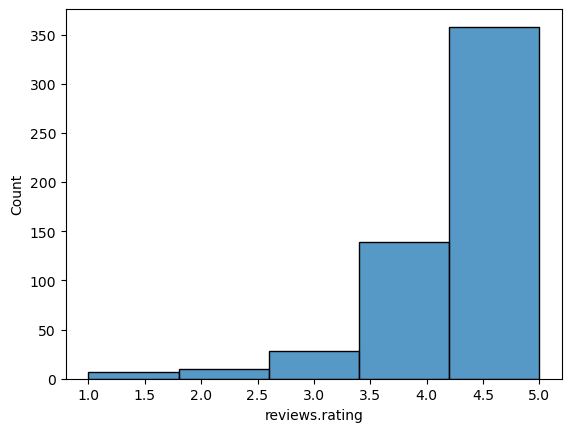

In [4]:
#Histogram of ratings
sns.histplot(data=data, x='reviews.rating', bins=5)
plt.show()

### counting values in each columns

In [5]:
# distribution of rating
data['reviews.rating'].value_counts().sort_index(ascending=False)

reviews.rating
5.0    358
4.0    139
3.0     28
2.0     10
1.0      7
Name: count, dtype: int64

creates a histogram of the distribution of review lengths in a dataset. This can be useful to gain insights into the nature of the reviews, such as whether they tend to be short or long, or if there are any extreme outliers in the length of the reviews. The Seaborn library is used to create the histogram, and the 'review_length' column is created by applying the 'len()' function to the 'reviews.text' column. The resulting visualization can help to inform further analysis or decision-making based on the dataset.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


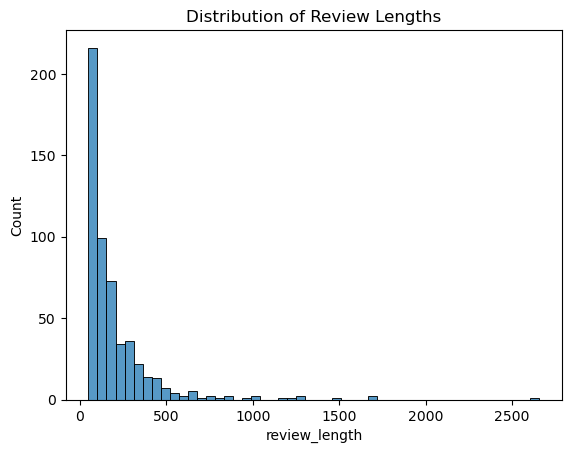

In [6]:
data['review_length'] = data['reviews.text'].apply(len)
sns.histplot(data=data, x='review_length', bins=50)
plt.title('Distribution of Review Lengths')
plt.show()

The scatter plot shows that there is no clear relationship between review length and rating. Customers have given both high and low ratings regardless of the length of the reviews. However, there are a slightly higher number of reviews with lengths between 0 and 2500 characters for all ratings.

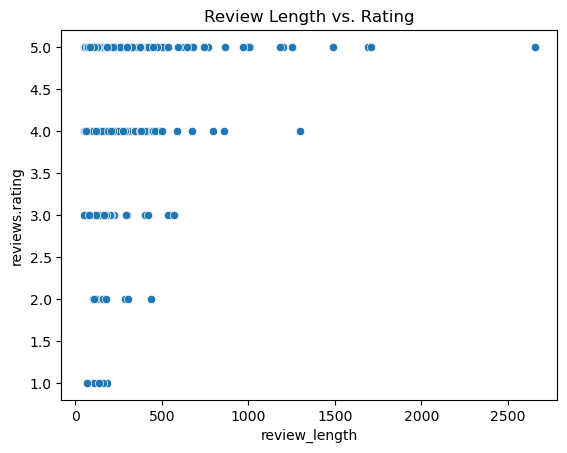

In [7]:
sns.scatterplot(x='review_length', y='reviews.rating', data=data)
plt.title('Review Length vs. Rating')
plt.show()

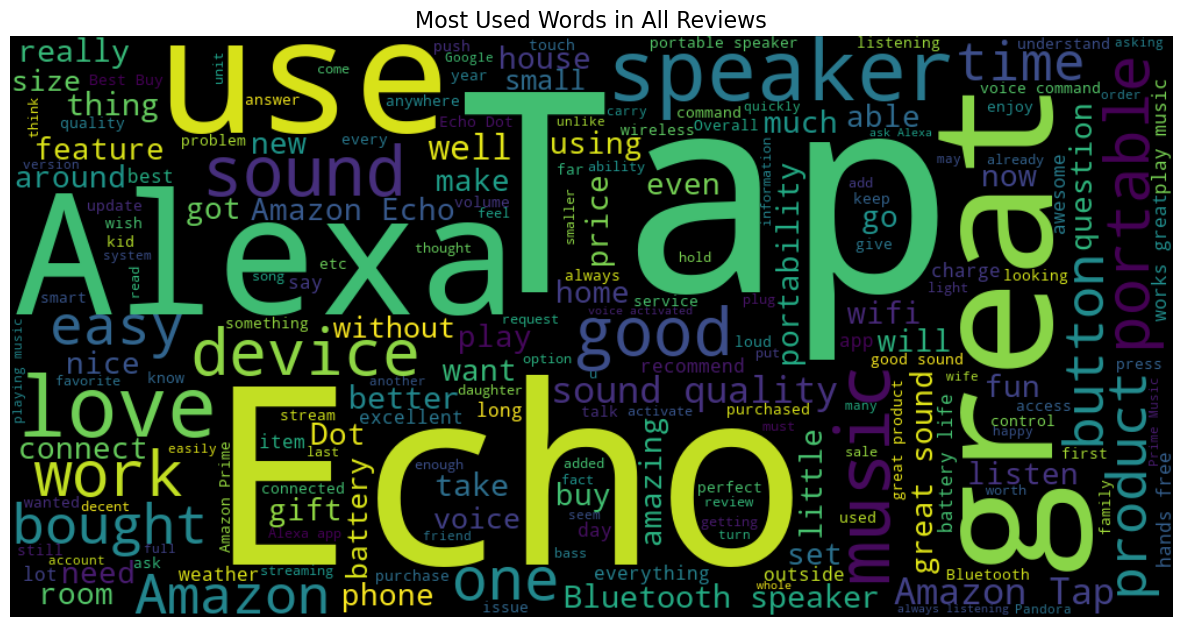

In [8]:
# plot word cloud
all_words = pd.Series(' '.join(data['reviews.text']).split())
wc = WordCloud(width=1000, height=500).generate(' '.join(all_words))

# Plot the word cloud
plt.figure(figsize=(15,8))
plt.imshow(wc, interpolation='bilinear')
plt.title("Most Used Words in All Reviews", size=16)
plt.axis("off")
plt.show()

In [9]:
# descriptive statistics
data.describe()

,ean,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince,sizes,upc,review_length
count,5.420000e+02,542.000000,542.000000,0.0,0.0,0.0,5.420000e+02,542.000000
mean,8.416670e+11,3.014760,4.533210,NaN,NaN,NaN,8.416670e+11,198.180812
std,0.000000e+00,41.098544,0.786793,NaN,NaN,NaN,0.000000e+00,231.310053
min,8.416670e+11,0.000000,1.000000,NaN,NaN,NaN,8.416670e+11,49.000000
25%,8.416670e+11,0.000000,4.000000,NaN,NaN,NaN,8.416670e+11,79.250000
50%,8.416670e+11,0.000000,5.000000,NaN,NaN,NaN,8.416670e+11,125.500000
75%,8.416670e+11,0.000000,5.000000,NaN,NaN,NaN,8.416670e+11,219.000000
max,8.416670e+11,806.000000,5.000000,NaN,NaN,NaN,8.416670e+11,2657.000000


In [10]:
data.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'dateAdded',
       'dateUpdated', 'dimension', 'ean', 'keys', 'manufacturer',
       'manufacturerNumber', 'name', 'prices', 'reviews.date',
       'reviews.doRecommend', 'reviews.numHelpful', 'reviews.rating',
       'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'sizes',
       'upc', 'weight', 'review_length'],
      dtype='object')

## Preliminary analysis

#### Pre-Processing

clean_text that takes in a string of text as input and performs various text cleaning operations on it. Specifically, it removes all non-alphabetic characters, converts the text to lowercase, splits the text into individual words, removes any stopwords (common words such as "the", "and", "a", etc.), and finally joins the remaining words back into a single string. This function is useful for preparing text data for use in machine learning models, as it helps to standardize the format of the text and remove any noise or irrelevant information. In this report, we will use this function to preprocess the Amazon product reviews before feeding them into our machine learning pipelines.To classify the reviews based on the product ratings, we will apply different machine learning techniques using the sklearn library. We will first preprocess the text data by removing non-alphabetic characters, modifying the text to lowercase, splitting the text into words, removing stop words, and joining the words back into a string.

Let's first do some preprocessing. For tokenisation, though one can use NLTK as well, let's try using gensim's simple_preprocess this time. The preprocessing pipeline is mentioned below.

1. Tokenize each review (using gensim)
2. Remove stop words (including punctuations)
3. Lemmatize (using spacy) that uses POS tags of words, so we need to specify a list of POS tags - here we've used ['NOUN', 'ADJ', 'VERB', 'ADV'] .

In [11]:
# tokenize using gensim simple_preprocess
def sent_to_words(sentences, deacc=True): # deacc=True removes punctuations
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence)))  


# convert to list
data = data['reviews.text'].values.tolist()
data_words = list(sent_to_words(data))

# sample
print(data_words[3])

['look', 'at', 'this', 'product', 'as', 'portable', 'speaker', 'first', 'and', 'an', 'echo', 'replacement', 'second', 'the', 'big', 'reason', 'to', 'buy', 'this', 'over', 'standard', 'bluetooth', 'speakers', 'is', 'this', 'has', 'wifi', 'streaming', 'enabled', 'when', 'you', 'are', 'at', 'home', 'you', 'can', 'stream', 'music', 'with', 'ease', 'to', 'it', 'voice', 'recognition', 'is', 'top', 'notch', 'and', 'it', 'really', 'shines', 'when', 'using', 'it', 'with', 'other', 'smart', 'home', 'accessories', 'the', 'only', 'problem', 'is', 'having', 'to', 'tap', 'the', 'microphone', 'button', 'for', 'it', 'to', 'listen', 'to', 'your', 'voice', 'if', 'you', 'want', 'bigger', 'sound', 'and', 'always', 'listening', 'features', 'spend', 'the', 'extra', 'money', 'on', 'the', 'amazon', 'echo']


The code below creates a list of stop words. The 'string' module in python comes with a list of punctuation characters, which we'll append to the builtin stopwords of NLTK.

In [12]:
# create list of stop words
# string.punctuation (from the 'string' module) contains a list of punctuations
from nltk.corpus import stopwords
stop_words = stopwords.words('english') + list(string.punctuation)

In [13]:
# functions for removing stopwords and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [14]:
# call functions

# remove stop words
data_words_nostops = remove_stopwords(data_words)

# initialize spacy 'en' model, use only tagger since we don't need parsing or NER 
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_nostops, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[3])

['look', 'product', 'portable', 'speaker', 'second', 'big', 'reason', 'buy', 'standard', 'wifi', 'streaming', 'enable', 'home', 'stream', 'music', 'ease', 'voice', 'recognition', 'top', 'notch', 'really', 'shine', 'use', 'smart', 'home', 'accessory', 'problem', 'tap', 'microphone', 'button', 'listen', 'voice', 'want', 'big', 'sound', 'always', 'listen', 'feature', 'spend', 'extra', 'money']


In [15]:
# compare the nostop, lemmatised version with the original one
# note that speakers is lemmatised to speaker; 
print(' '.join(data_words[3]), '\n')
print(' '.join(data_lemmatized[3]))

look at this product as portable speaker first and an echo replacement second the big reason to buy this over standard bluetooth speakers is this has wifi streaming enabled when you are at home you can stream music with ease to it voice recognition is top notch and it really shines when using it with other smart home accessories the only problem is having to tap the microphone button for it to listen to your voice if you want bigger sound and always listening features spend the extra money on the amazon echo 

look product portable speaker second big reason buy standard wifi streaming enable home stream music ease voice recognition top notch really shine use smart home accessory problem tap microphone button listen voice want big sound always listen feature spend extra money


### Creating Dictionary and Corpus

Gensim's LDA requires the data in a certain format. Firstly, it needs the corpus as a dicionary of id-word mapping, where each word has a unique numeric ID. This is for computationally efficiency purposes. Secondly, it needs the corpus as a term-document frequency matrix which contains the frequency of each word in each document.

In [16]:
# create dictionary and corpus
# create dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create corpus
corpus = [id2word.doc2bow(text) for text in data_lemmatized]

# sample
print(corpus[2])

[(3, 2), (13, 2), (16, 2), (17, 3), (20, 2), (24, 4), (29, 1), (31, 1), (35, 1), (48, 2), (51, 1), (56, 1), (60, 5), (70, 1), (82, 1), (85, 5), (88, 1), (90, 2), (95, 1), (96, 1), (97, 2), (99, 2), (100, 1), (108, 2), (112, 1), (116, 1), (120, 1), (128, 2), (131, 1), (134, 1), (141, 1), (142, 1), (143, 2), (144, 1), (145, 1), (146, 1), (147, 1), (148, 1), (149, 1), (150, 1), (151, 1), (152, 1), (153, 1), (154, 2), (155, 1), (156, 1), (157, 1), (158, 1), (159, 1), (160, 1), (161, 1), (162, 1), (163, 2), (164, 1), (165, 1), (166, 3), (167, 1), (168, 1), (169, 1), (170, 1), (171, 1), (172, 1), (173, 1), (174, 1), (175, 1), (176, 1), (177, 1), (178, 1), (179, 2), (180, 1), (181, 1), (182, 2), (183, 2), (184, 5), (185, 1), (186, 3), (187, 2), (188, 1), (189, 3), (190, 1), (191, 1), (192, 1), (193, 1), (194, 6), (195, 1), (196, 1), (197, 2), (198, 1), (199, 2), (200, 1), (201, 1), (202, 1), (203, 1), (204, 1), (205, 1), (206, 2), (207, 1), (208, 1), (209, 2), (210, 1)]


The (3, 7) above represents the fact that the word with id=3 appears 7 times in the second document (review), word id 12 appears twice and so on. The nested list below shows the frequencies of words in the first document.

In [17]:
# Words appaers and it's total frequency
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('admit', 1),
  ('alexa', 1),
  ('allow', 1),
  ('amazon', 1),
  ('announce', 1),
  ('answer', 1),
  ('anyway', 1),
  ('app', 2),
  ('appealing', 1),
  ('associate', 1),
  ('avid', 1),
  ('aware', 1),
  ('back', 1),
  ('battery', 3),
  ('buy', 1),
  ('choose', 2),
  ('command', 1),
  ('control', 1),
  ('convenience', 1),
  ('cook', 1),
  ('day', 1),
  ('decide', 2),
  ('demand', 1),
  ('development', 1),
  ('device', 3),
  ('dot', 1),
  ('drain', 1),
  ('early', 2),
  ('easily', 2),
  ('echo', 1),
  ('enable', 1),
  ('especially', 1),
  ('fabulous', 1),
  ('financial', 1),
  ('firmware', 1),
  ('first', 1),
  ('free', 6),
  ('get', 1),
  ('give', 1),
  ('go', 1),
  ('hand', 6),
  ('high', 1),
  ('hope', 1),
  ('important', 1),
  ('introduce', 1),
  ('keep', 1),
  ('kitchen', 1),
  ('lack', 1),
  ('life', 1),
  ('listener', 1),
  ('little', 2),
  ('lot', 1),
  ('love', 1),
  ('major', 1),
  ('make', 1),
  ('maximum', 1),
  ('microphone', 1),
  ('mind', 1),
  ('minimal', 1),
  ('mode',

## Building the Topic Model

Let's now build the topic model. We'll define 10 topics to start with. The hyperparameter alpha affects sparsity of the document-topic (theta) distributions, whose default value is 1. Similarly, the hyperparameter eta can also be specified, which affects the topic-word distribution's sparsity.

In [18]:
# help(gensim.models.ldamodel.LdaModel)

In [19]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [20]:
# print the 10 topics
pprint.pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.068*"amazing" + 0.033*"easy" + 0.031*"little" + 0.030*"super" + '
  '0.026*"sync" + 0.024*"able" + 0.022*"beach" + 0.021*"weather" + '
  '0.017*"difficult" + 0.016*"assistant"'),
 (1,
  '0.061*"easy" + 0.057*"sound" + 0.043*"portability" + 0.038*"buy" + '
  '0.037*"echo" + 0.035*"feature" + 0.028*"house" + 0.028*"quality" + '
  '0.020*"need" + 0.020*"room"'),
 (2,
  '0.064*"loud" + 0.044*"decent" + 0.042*"expensive" + 0.035*"capability" + '
  '0.031*"glad" + 0.023*"upgrade" + 0.022*"mother" + 0.018*"issue" + '
  '0.015*"size" + 0.015*"online"'),
 (3,
  '0.043*"enjoy" + 0.039*"talk" + 0.033*"button" + 0.030*"alexa" + '
  '0.024*"thing" + 0.024*"fun" + 0.022*"put" + 0.021*"tap" + 0.020*"hold" + '
  '0.020*"lot"'),
 (4,
  '0.057*"great" + 0.048*"speaker" + 0.043*"use" + 0.037*"sound" + 0.035*"tap" '
  '+ 0.032*"love" + 0.031*"good" + 0.031*"music" + 0.028*"alexa" + '
  '0.026*"work"'),
 (5,
  '0.070*"set" + 0.037*"start" + 0.034*"actually" + 0.030*"radio" + '
  '0.027*"come" + 0

## Evaluate the model using coherence score.

In [21]:
# coherence score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.4395692084830964


## Data Visualisation using pyLDAvis library

In [22]:
# visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.323409 -0.008686       1        1  46.543002
6      0.002900 -0.143573       2        1  14.357179
9      0.047290 -0.145600       3        1  11.812883
1      0.158944  0.255862       4        1   9.647376
3      0.068184 -0.139454       5        1   7.020626
5     -0.122254  0.000296       6        1   3.472688
8     -0.098319  0.066383       7        1   2.434910
0     -0.125365  0.054602       8        1   1.986343
2     -0.131951  0.027342       9        1   1.878914
7     -0.122837  0.032827      10        1   0.846078, topic_info=        Term        Freq       Total Category  logprob  loglift
82     sound  199.000000  199.000000  Default  30.0000  30.0000
85       tap  249.000000  249.000000  Default  29.0000  29.0000
52      love  156.000000  156.000000  Default  28.0000  28.0000
388     easy   57.000000   57.000000  Default  27.0000  27.0000
194  speaker  196.000000  196.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
988  opposed    0.349115    1.034819  Topic10  -5.3524   3.6857
987    cloud    0.740884    2.680411  Topic10  -4.5999   3.4864
108     come    1.275886   10.097971  Topic10  -4.0564   2.7036
256   pretty    0.717024   19.660767  Topic10  -4.6327   1.4610
304     feel    0.435567    7.723751  Topic10  -5.1311   1.8969

[468 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
102       2  0.184421    ability
102       4  0.737685    ability
277       2  0.575167       able
277       3  0.301278       able
277       8  0.109556       able
...     ...       ...        ...
1316      6  0.887562  worldwide
307       1  0.944964      worth
141       5  0.634397       year
141       6  0.380638       year
679       5  0.860517        yet

[533 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 7, 10, 2, 4, 6, 9, 1, 3, 8])

## Hyperparameter Tuning - Number of Topics and Alpha to maximize the coherenc score

In [24]:
# compute coherence value at various values of alpha and num_topics
def compute_coherence_values(dictionary, corpus, texts, num_topics_range, alpha_range):
    
    coherence_values = []
    model_list = []
    for alpha in alpha_range:
        for num_topics in num_topics_range:
            lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=dictionary,
                                               num_topics=num_topics, 
                                               alpha=alpha,
                                               per_word_topics=True)
            model_list.append(lda_model)
            coherencemodel = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
            coherence_values.append((alpha, num_topics, coherencemodel.get_coherence()))
        

    return model_list, coherence_values

In [25]:
# build models across a range of num_topics and alpha
num_topics_range = [2, 6, 10, 15, 20]
alpha_range = [0.01, 0.1, 1]
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=data_lemmatized, 
                                                        num_topics_range=num_topics_range, 
                                                        alpha_range=alpha_range)

In [26]:
coherence_df = pd.DataFrame(coherence_values, columns=['alpha', 'num_topics', 'coherence_value'])
coherence_df

,alpha,num_topics,coherence_value
0,0.01,2,0.468710
1,0.01,6,0.424338
2,0.01,10,0.392982
3,0.01,15,0.405932
4,0.01,20,0.402208
5,0.10,2,0.462622
6,0.10,6,0.430676
7,0.10,10,0.437314
8,0.10,15,0.392334
9,0.10,20,0.394999


In [27]:
coherence_df.sort_values('coherence_value')

,alpha,num_topics,coherence_value
8,0.10,15,0.392334
2,0.01,10,0.392982
9,0.10,20,0.394999
4,0.01,20,0.402208
3,0.01,15,0.405932
1,0.01,6,0.424338
6,0.10,6,0.430676
7,0.10,10,0.437314
10,1.00,2,0.444253
11,1.00,6,0.460876


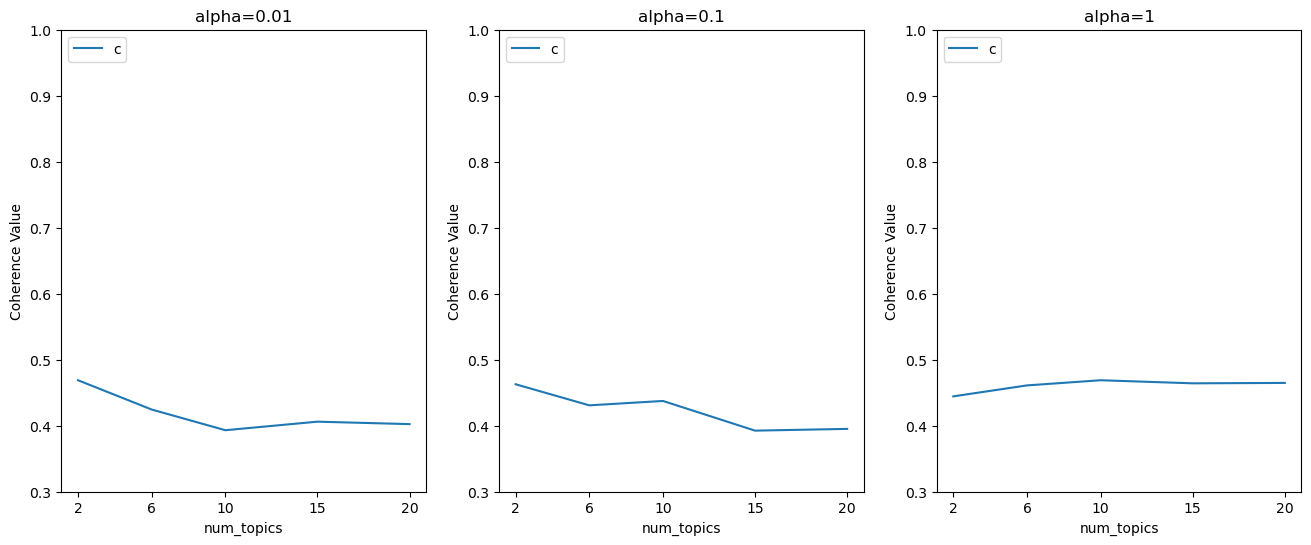

In [28]:
# plot
def plot_coherence(coherence_df, alpha_range, num_topics_range):
    plt.figure(figsize=(16,6))

    for i, val in enumerate(alpha_range):

        # subplot 1/3/i
        plt.subplot(1, 3, i+1)
        alpha_subset = coherence_df[coherence_df['alpha']==val]

        plt.plot(alpha_subset["num_topics"], alpha_subset["coherence_value"])
        plt.xlabel('num_topics')
        plt.ylabel('Coherence Value')
        plt.title("alpha={0}".format(val))
        plt.ylim([0.30, 1])
        plt.legend('coherence value', loc='upper left')
        plt.xticks(num_topics_range)

plot_coherence(coherence_df, alpha_range, num_topics_range)

In [29]:
#Finally building the LDA Model by selecting 

Final_LDA_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                  id2word=id2word,
                                                  num_topics=6,
                                                  random_state=100,
                                                  update_every=1,
                                                  chunksize=100,
                                                  passes=10,
                                                  alpha=1,
                                                  per_word_topics=True)

In [30]:
# print the 10 topics
pprint.pprint(Final_LDA_model.print_topics())
doc_lda = Final_LDA_model[corpus]

[(0,
  '0.068*"use" + 0.029*"enjoy" + 0.026*"able" + 0.023*"question" + '
  '0.021*"little" + 0.018*"hand" + 0.016*"app" + 0.015*"free" + 0.015*"ask" + '
  '0.014*"alexa"'),
 (1,
  '0.112*"sound" + 0.066*"great" + 0.057*"good" + 0.040*"quality" + '
  '0.026*"speaker" + 0.025*"easy" + 0.024*"well" + 0.023*"alexa" + '
  '0.018*"price" + 0.017*"portability"'),
 (2,
  '0.120*"love" + 0.078*"buy" + 0.048*"great" + 0.045*"use" + 0.042*"product" '
  '+ 0.040*"music" + 0.034*"play" + 0.025*"gift" + 0.016*"fun" + 0.015*"lot"'),
 (3,
  '0.057*"get" + 0.054*"tap" + 0.043*"portable" + 0.037*"work" + 0.036*"alexa" '
  '+ 0.034*"echo" + 0.031*"dot" + 0.030*"button" + 0.026*"speaker" + '
  '0.023*"listen"'),
 (4,
  '0.049*"speaker" + 0.027*"voice" + 0.025*"music" + 0.025*"connect" + '
  '0.024*"time" + 0.023*"phone" + 0.021*"wifi" + 0.020*"device" + 0.017*"say" '
  '+ 0.017*"also"'),
 (5,
  '0.073*"tap" + 0.022*"make" + 0.020*"purchase" + 0.019*"excellent" + '
  '0.017*"add" + 0.017*"even" + 0.015*"h

In [31]:
# coherence score
coherence_model_lda = CoherenceModel(model=Final_LDA_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.4320839187148216
